## Лекция 3. Доверительные интервалы и тестирование параметрических гипотез

### Часть 1

In [1]:
import scipy.stats as stats # импортируем библиотеку для статистических функций
import pandas as pd # импортируем библиотеку pandas для обработки табличных данных
import numpy as np # импортируем библиотеку numpy для реализации математических операций

Наша задача -  научиться по выборкам делать выводы о параметрах генеральной совокупности.


Проведем эксперимент: возьмем выборку объемом в 10, 20 и 30 чисел из нормальной генеральной совокупности с матожиданием, равным нулю, и стандартным отклонением, равным 1 (стандартный номальный закон $Z_i \sim N(0;1) $).
Если бы мы не знали, что это стандартный нормальный закон, то  для того, чтобы оценить, чему равно среднее для генеральной совокупности, нам надо было бы посчитать выборочное среднее по каждой из трех выборок.

In [17]:
# Выборки 10, 20, 30 наблюдений:

for i in range(3): # реализуем три итерации цикла
      print(np.random.normal(size=(10*(i+1))).mean()) # на каждой берем выборку и считаем среднее

# Выборки 1000, 2000, 3000 наблюдений:

for i in range(3): # реализуем три итерации цикла
      print(np.random.normal(size=(1000*(i+1))).mean()) # на каждой берем выборку и считаем среднее

-0.09782029681892845
-0.2859862948779878
-0.18357245891199478
-0.017264130403158353
0.05229360687873961
-0.006850611170508861


Все три раза они получились разными (не равными друг другу), и к тому же не равными настоящему среднему из генеральной совокупности (нулю).

Выборочное среднее, которое мы три раза искали выше, называется "точечной оценкой" генерального среднего значения, и мы убедились в том, что такая оценка близка к оцениваемому параметру (обычно чем больше объем выборки, тем ближе), но никогда не равна ему. Это связано с тем, что выборочное среднее -- это случайная величина, которая сама имеет нормальное распределение, а для непрерывной случайной величины вероятность того, что она примет какое-то конкретное значение, равна нулю.

Чтобы обойти эту проблему с точечными оценками, можно использовать "интервальные" оценки -- сообщать некоторый диапазон значений, который будет содержать оцениваемый параметр с нужной заранее известной вероятностью.

Из курса статистики известно, что доверительный интервал, который с доверительной вероятностью $\gamma$ накроет генеральное среднее, ищется по формуле $M \pm \varepsilon$ (в наших обозначениях $M = \bar{X}$, то есть это выборочное среднее), а для нахождения  $\varepsilon$ надо использовать одну из двух формул:

1. Если нам известно стандартное отклонение генеральной совокупности $\sigma$, то используем формулу $\varepsilon = z_{\alpha/2}\cdot \frac{\sigma}{\sqrt n}$, где $z_{\alpha/2}$ отрезает от нормального распределения правый хвост объема $\alpha/2$.

2. Если же у нас нет генерального стандартного отклонения, то вместо $\sigma$ надо использовать $s$  -- выборочное стандартное оклонение, а вместо $z_{\alpha/2}$ используется $t_{\alpha/2}$ -- это число отрезает от распределения Стьюдента правый хвост объема $\alpha/2$, распределение используется с $n-1$ степенью свободы.

Уровень доверия $\gamma$ берется близким к 1 (0.9, 0.95, 0.99), а $\alpha = 1 - \gamma$



Теперь посмотрим, как найти доверительный интервал с помощью встроенных методов питона.

Предположим, мы хотим найти 95% доверительный интервал для средней оценки за контрольную работу по 9 студентам, если нам заранее известно, что стандартное отклонение  оценки за эту контрольную работу по всем студентам равно $1.5$.

In [19]:
data1 = np.array([6, 7, 8, 4, 3, 6, 7, 8, 5])
sigma = 1.5
stats.norm.interval(0.95, loc=data1.mean(), scale=sigma/np.sqrt(len(data1)))
# первый параметр это доверительная вероятность, второй - середина доверительного интервала,
# третий - соответствующий множитель из формулы

(5.020018007729973, 6.979981992270027)

**Вывод:**

- С доверительной вероятностью 95% интервал (5.02, 6.98) накрывает среднюю оценку за контрольную по всем студентам.

или

- С вероятностью 95% средняя оценка студентов находится в интервале (5.02, 6.98)

Теперь сделаем все то же самое для второго типа доверительных интервалов, то есть в ситуации, когда у нас нет генерального стандартного отклонения (а скорее всего так и будет - довольно редко бывает так, что генеральное стандартное отклонение есть, а генерального среднего нет).

Пусть у нас есть оценки за экзамен по 10 студентам, и мы снова хотим найти 95% доверительный интервал для средней оценки по всем студентам (генеральное стандартное отклонение мы не знаем)

In [25]:
data2 = np.array([6, 8, 5, 4, 7, 5, 8, 7, 6, 9])

sigma = data2.std(ddof=1) # т.к это не генеральное стандартное отклонение, то делим не на n, а на n-1
stats.t.interval(0.99, df=len(data2) - 1, loc=data2.mean(), scale=sigma/np.sqrt(len(data2)))
# добавился новый параметр - это число степеней свободы, то есть n-1

(4.8750822292039375, 8.124917770796063)

**Вывод:**

- С доверительной вероятностью 95% интервал (5.37, 7.63) накрывает среднюю оценку за контрольную по всем студентам.

или

- С вероятностью 95% средняя оценка студентов находится в интервале (5.37, 7.63)

Пример того, как ищутся критические точки $z_{\alpha/2}$ и $t_{\alpha/2}$ для 95% доверительных интервалов приведен ниже

In [18]:
gamma = 0.95
alpha = 1 - gamma

In [19]:
stats.norm.ppf(1 - alpha/2) # ppf  - функция процентных точек, находит квантиль указанного в скобках уровня

1.959963984540054

In [20]:
stats.t.ppf(1 - alpha/2, df=1000) # число степеней свободы должно равняться n-1

1.9623390808264074

### B1

Винни-Пух в течение 150 дней фиксировал изменения количества пчёл в улье. Он уверен, что полученные наблюдения являются выборкой независимых одинаково распределённых нормальных случайных величин. Оказалось, что среднее количество пчёл равно 25000, а выборочная дисперсия равна 1300. Постройте 95%-ый доверительный интервал для математического ожидания количества пчёл в улье, используя Z-оценку, и выпишите в ответ его нижнюю границу, округлённую до целого.

Пример ответа: 1500

**Вариант 1**

$$\varepsilon = z_{\alpha/2}\cdot \frac{\sigma}{\sqrt n}$$

In [21]:
from scipy import stats

n = #размер выборки
sigma = #точечное стандартное отклонение
avg = #среднее арифметическое
gamma = #уровень доверия
alpha = 1 - gamma
z_cr = #z-критическое
e = #эпселент
left = #нижняя граница
left

SyntaxError: invalid syntax (3785641820.py, line 3)

**Вариант 2**

In [22]:
from scipy import stats

stats.norm.interval(#уровень доверия,
                    loc=#среднее,
                    scale=#ст.откл/np.sqrt(#размер выборки)
                    )

SyntaxError: invalid syntax (2562877731.py, line 5)

### Часть 2. Семинар 10

# Параметрические критерии для тестирования гипотез
Выше мы вспомнили, как искать интервальные оценки для среднего в генеральной совокупности, теперь мы подойдем к задаче оценки параметров генеральной совокупности с новой стороны. Речь все так же будет идти о генеральном среднем.

Предположим, у нас есть все та же контрольная, о которой мы говорили в первом примере, и до контрольной у нас есть четыре предположения о том, насколько сложной будет работа: кто-то считает, что средний балл будет равен 4.2, кто-то считает что 4.9, еще есть вариант 6.2 и вариант 7.4.

Мы строили 95% доверительный интервал, который оказался равен (5.02; 6.98) -- мы на 95% уверены, что этот интервал содержит среднюю оценку по всем студентам, это означает, что предположение о том, что средняя оценка равна 6.2 не противоречит нашим реальным данным, а оставшиеся три, которые не попадают в интервал, следует поставить под сомнение.

Примерно так и будет проходить проверка гипотез: у нас есть "нулевая" или "основная" гипотеза - предположение о среднем значении интересующего нас признака. По  имеющейся случайной выборке мы считаем число, которое называется "статистикой". Если предположение нулевой гипотезы верное, то статистика имеет известное распределение, и можно понять, насколько полученное число соответствует этому распределению. Например, для стандартного нормального закона значение -0.2 не вызывает никаких вопросов, а 4.5 вызывает -- если мы увидим такое число, то возможны два варианта: либо произошло очень маловероятное событие, либо мы неправильно предположили, что работаем со стандартным нормальным законом.

Для того, чтобы отделить критические значения статистики от естественных, задается малая вероятность $\alpha$ (уровень значимости). Это вероятность ошибки первого рода, то есть того, что мы посчитаем нулевую гипотезу неверной, хотя на самом деле она будет верной.

#### **Z-статистика**

**Ограничения:**

- исходные данные имеют нормальное распределение
- известна дисперсия генеральной совокупности

Вы спросили 100 своих сокурсников: Сколько в среднем они спят? На основе этих данных нужно проверить гипотезу о том, что люди в среднем спят 7 часов, если известно, что стандартное отклонение равно 1

In [39]:
#результаты опроса
hse = np.random.normal(7.5, 1, 100)
hse

array([6.14898637, 8.36042478, 8.54434563, 6.19085694, 9.72577361,
       8.28897371, 6.70438669, 7.33327354, 9.04477857, 6.93454557,
       6.53910074, 6.31390947, 6.28801397, 7.58810384, 5.464691  ,
       8.34321567, 7.75412187, 8.35598955, 8.40717163, 5.35286566,
       8.35232123, 7.67687232, 7.14810569, 6.44947628, 9.02716538,
       6.6242652 , 7.40664041, 6.3596525 , 7.79749417, 8.04850322,
       7.00440749, 8.63965373, 7.48749913, 7.36117506, 8.29735784,
       7.34873703, 8.1261737 , 7.26520369, 6.43226691, 8.1392704 ,
       5.30959374, 7.04028791, 6.9507404 , 6.46929151, 5.47235522,
       7.75617989, 6.81270403, 8.0691346 , 6.82637571, 5.84740048,
       5.57674879, 8.56822691, 8.59101975, 7.24412792, 7.64937428,
       6.71145832, 8.40834257, 8.44411931, 8.42034426, 8.76506408,
       6.94473793, 7.12481529, 7.80824091, 8.03576776, 8.41913353,
       7.09646815, 8.7027636 , 8.17022391, 8.03776175, 8.41326313,
       8.50233061, 7.18104783, 9.17098276, 6.03742863, 7.18104

In [50]:
#import pandas as pd
#df = pd.read_csv('/Users/matveybaksuk/Downloads/main_df.csv')

#df.info()

df['district_name'].unique()
df.columns

Index(['timestamp', 'district_name', 'district_id', 'lat', 'lon',
       'n_taxi_start', 'n_taxi_end', 'n_carsharing_start', 'n_carsharing_end',
       'temperature', 'precipitation', 'humidity', 'wind_speed',
       'weather_code', 'rush_hour', 'season', 'is_holiday_or_weekend',
       'quarter', 'station_load', 'number_of_stations', 'number_of_places',
       'population_district_2023', 'population_near_metro', 'price_m2'],
      dtype='object')

In [37]:
M = np.mean(hse)
M #cреднее по выборке

6.915489836511532

**1. Формулируем гипотезы**

$$
\begin{aligned}
&H_о: μ=7 \\
&H_а: μ≠7
\end{aligned}
$$

**2. Выбираем уровень значимости и находим критические значения**

$$α = 5\% $$

In [34]:
from scipy.stats import norm
from scipy import stats

alpha = 0.05

print(norm.ppf(alpha/2),norm.ppf(1-alpha/2))

-1.9599639845400545 1.959963984540054


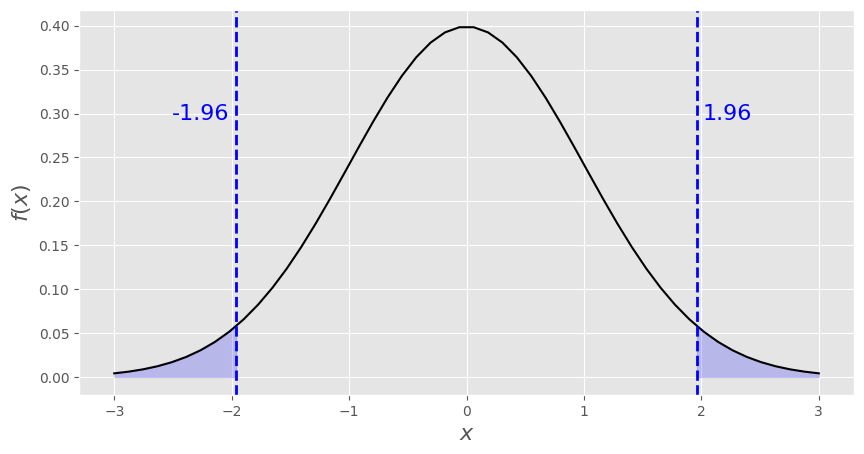

**3. Считаем тестовую статистику**

$$
Z_{stat} = \frac{M - \mu}{\sigma / \sqrt{n}}
$$

In [38]:
from statsmodels.stats.weightstats import ztest as ztest
# сгенерируем данные из нормального распределения с заданными параметрами
# Z-тест:
#   data - выборка
#   value - значение нулевой гипотезы
#   alternative - тип альтернативной гипотезы: 'two-sided', 'larger', 'smaller'

result = ztest(hse, value = 7.0, alternative = 'two-sided')

print(f'Z-statistics = {round(result[0],3)}\
\n p-value = {round(result[1],3)}')

Z-statistics = -0.924
 p-value = 0.356


**4. Сделать вывод**

**Путь 1**. Сравнить Z-статистику с критическими значениями

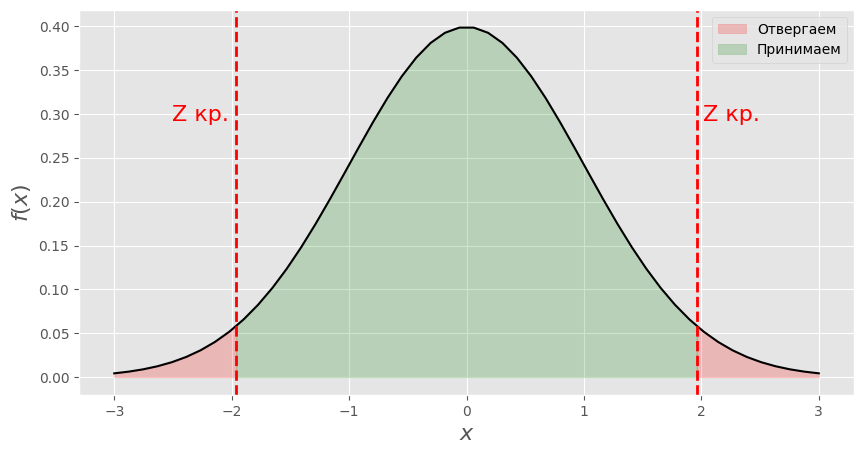

- Если Z-статистика попадает в диапазон от [-Z_кр;Z_кр], то гипотеза основная **принимается** на заданому уровне значимости
- Если Z-статистика меньще -Z_кр или больше Z_кр, то гипотеза основная **отвергается** на заданом уровне значимости

В нашем случае Z-статистикака не попадает в диапазон, а значит основная гипотеза отвергается. Значит мы не можем сказать, что в среднем люди спять 7 часов

Путь 2. Через **p-value**

p-value, интерпретируется так: на любом уровне значимости, большем чем это число, нулевая гипотеза отвергается:
- Если уровень значимости **p-value** **больше** чем уровень значимости (**α**), то основная гипотеза **принимается**
- Если уровень значимости **p-value** **меньше** чем уровень значимости (**α**), то основная гипотеза **отвергается**


In [30]:
result[1] > alpha

False

В нашем случае $p_{value}$ < $\alpha$ -> **Основная гипотеза отвергается**

#### **t-статистика**

**Ограничения:**

- неизвестна дисперсия по генеральной совокупности

Вы спросили 100 своих одногруппников: Сколько в среднем они спят? На основе этих данных нужно проверить гипотезу о том, что люди в среднем спят 7 часов

In [28]:
hse

array([6.50876921, 6.37809416, 8.24313325, 6.16063538, 7.12806853,
       8.23873304, 7.52722238, 9.56908754, 7.66672499, 7.39755395,
       7.13539052, 9.23908826, 7.11667229, 7.95560297, 7.06382571,
       9.20917701, 8.24881398, 7.26548231, 7.13548104, 9.0983589 ,
       7.16916766, 9.45795173, 6.63952992, 8.20243852, 5.66140629,
       8.48812992, 7.67269371, 8.02753409, 7.13789984, 8.74422655,
       6.25859371, 6.73398671, 7.3394661 , 9.12869296, 7.55415052,
       6.05407729, 7.49692933, 8.18118691, 8.26232827, 8.24418382,
       5.92261775, 6.7014274 , 5.88656409, 8.24769428, 7.07866935,
       8.51640276, 7.22579455, 8.14603204, 6.72272469, 7.75475956,
       6.42846564, 9.14787975, 6.19295895, 7.68183075, 7.43932292,
       5.90486277, 6.4634526 , 7.43124701, 7.48723739, 8.39077637,
       9.36108961, 7.74517864, 7.18510753, 5.40227866, 7.30140744,
       7.55662022, 6.16786936, 9.41855751, 6.58301802, 7.31453452,
       7.82523691, 7.05513808, 6.23995916, 8.5387278 , 6.91630

**1. Формулируем гипотезы**

$$
\begin{aligned}
&H_о: μ=7 \\
&H_а: μ≠7
\end{aligned}
$$

**2. Выбираем уровень значимости**

$$α = 5\% $$

In [30]:
alpha = 0.05

**3. Считаем p-value**

In [39]:
#perform one sample t-test
result = stats.ttest_1samp(a=hse, popmean=7, alternative='two-sided')
result
#'less', 'greater' or 'two-sided', по умолчанию - двусторонняя

#3.552640205707792*10**(-8) == 
# 3.552640205707792/100000000

Ttest_1sampResult(statistic=5.979983754432888, pvalue=3.552640205707792e-08)

In [44]:
result.pvalue > alpha 

# если это даёт False:
# следовательно, result.pvalue <= alpha, тогда:
# H_0 отвергается, следовательно:
# среднее количество часов сна не равно 7 ;)

False

**4. Делаем вывод**

In [40]:
result.pvalue > alpha

False

В нашем случае p_value<α -> **Основная гипотеза отвергается**

### Гипотеза о равенстве математических ожиданий двух выборок

#### Выборки связаны

Вы спросили 100 своих одногруппников до начала сессии сколько часов они спят, а затем тем же людям задали этот вопрос во время сессии. Вы хотите проверить гипотезу о том, что до сессии и во время студенты спят в среднем одинаковое количество часов

In [48]:
before = np.random.normal(7.5, 1, 100)
before

array([ 6.71365039,  8.20145637,  7.93821493,  7.82793433,  6.39619316,
        8.07253596,  9.01496174,  8.19365531,  6.04083949,  8.03762119,
        7.31506953,  5.80193573,  8.76845765,  7.86621105,  8.25358605,
        6.44064455,  6.79123582,  7.75206222,  7.74456915,  7.73426626,
        5.89144948,  7.55611088,  7.38164127,  6.54759658,  8.95925743,
        6.65455706,  7.08608479,  7.85330467,  8.5981473 ,  7.05459062,
        9.26604008,  8.78377888,  5.88769088,  8.03396537,  6.79550899,
        7.25045896,  6.50895592,  6.57573658,  8.96887973,  6.50274551,
        7.2375832 ,  6.78376739,  8.03773617,  6.57735169,  8.6445061 ,
        6.73009992,  6.71895731,  6.27958218,  8.08304685,  8.1069305 ,
        6.61923891,  7.59183935,  8.04714954, 11.08140493,  6.60880145,
        7.69817754,  7.78097637,  5.47099594,  9.75090733,  6.44416735,
        8.99937359,  6.21361   ,  7.95063907,  8.33141158,  6.0743797 ,
        5.50485419,  7.99340493,  8.90280545,  6.72888877,  6.89

In [49]:
exam = np.random.normal(7.2, 1, 100)
exam

array([7.93350535, 6.29415058, 7.96525863, 7.76792848, 6.03121007,
       8.62312934, 8.0744303 , 7.87431729, 7.25205047, 5.83638401,
       7.05507239, 7.06349327, 8.73537162, 8.96556669, 6.1151745 ,
       8.20345584, 8.55906576, 8.84973286, 8.07182164, 5.96012661,
       6.33623243, 6.08018767, 7.32828481, 6.84205005, 7.07316461,
       8.43726308, 7.12000982, 6.9718856 , 6.24567222, 6.34583102,
       6.46841433, 6.20730389, 7.73376969, 6.74328245, 5.44468372,
       7.42271233, 7.55328311, 6.25045167, 6.34865597, 4.70936123,
       7.66747619, 7.26492142, 6.44036991, 7.38497801, 7.68856575,
       8.31809308, 6.02678473, 9.01295814, 6.21161255, 6.79556384,
       9.01619311, 6.80388023, 6.84681087, 7.35373621, 6.41038749,
       6.40060593, 6.22271815, 7.58362136, 7.52757866, 8.48375571,
       8.25206871, 6.91582896, 6.7136934 , 8.73956207, 5.75684478,
       8.41128839, 7.63394983, 7.3733595 , 6.01158638, 7.82649129,
       6.66802836, 9.56581813, 5.64454988, 5.65796598, 7.52117

In [53]:
print(np.mean(exam))
print(np.mean(before))

7.19341592743828
7.458847990813144


**1. Формулируем гипотезы**

$$
\begin{aligned}
&H_о: μ_b=μ_e \\
&H_а: μ_b≠μ_e
\end{aligned}
$$

**2. Выбираем уровень значимости**

$$α = 5\% $$

In [54]:
alpha = 0.05

**3. Считаем p-value**

Находим критические значения:

In [55]:
result = stats.ttest_rel(before, exam)
result

Ttest_relResult(statistic=1.852174206936979, pvalue=0.06698050318154193)

**4. Делаем вывод**

In [56]:
result.pvalue > alpha

True

В нашем случае p_value>α -> **Основная гипотеза принимается**

#### Выборки не связаны

Вы спросили 100 студентов Вышки и 100 студентов Плехановки сколько часов они спят. Вы хотите проверить гипотезу о том, что студенты Вышки и Плехановки спят в среднем одинаковое количество часов

In [58]:
hse = np.random.normal(7.5, 1, 100)
hse

array([ 6.7581916 ,  5.86981462,  8.00584955,  7.6866628 ,  8.90909028,
        7.67794942,  6.06846608,  6.84891488,  6.21870854,  8.36788946,
        7.52328518,  6.64055281,  6.4065292 ,  7.15827179,  5.4706595 ,
        8.04045256,  6.28191391,  7.2839394 ,  7.64528636,  6.32443342,
        9.2435768 ,  8.98142463,  8.33739133,  8.96219707,  8.30518448,
        7.16060446,  8.60028244,  8.88742223,  6.61121879,  5.71286302,
        7.39891183,  6.5059802 ,  9.48049256,  6.24001859,  7.20924276,
       10.21193093,  7.25448891,  8.18139057,  6.99403247,  8.23586484,
        6.17966277,  5.50251059,  7.57512973,  8.15654857,  7.5620693 ,
        7.45276706,  6.7012459 ,  7.45370975,  8.71607354,  6.57737753,
        7.48920182,  8.53572594,  5.19385125,  6.47365567,  9.77692474,
        8.03836698,  8.12388148,  6.52184925,  6.86958935,  8.11507615,
        7.75398796,  8.50247801,  7.93724048,  7.70293891,  7.45372404,
        8.478339  ,  8.90376698,  7.35472045,  7.35371672,  6.16

In [59]:
pleh = np.random.normal(7.1, 1.1, 100)
pleh

array([ 7.41930186,  5.37339839,  7.11594483, 10.01544197,  7.45592018,
        4.86193816,  7.50830423,  6.31762427,  7.4766036 ,  6.65479146,
        6.26387322,  6.8998019 ,  6.52169411,  8.54162142,  8.92014136,
        7.463227  ,  7.04570681,  7.88565038,  7.07817469,  5.0959118 ,
        5.96616277,  8.1179437 ,  6.85016513,  5.80837707,  8.85862227,
        7.00986354,  6.35436815,  6.52299716,  6.03331385,  7.0856435 ,
        5.56289853,  6.09387854,  7.01582131,  7.64917758,  7.22634595,
        6.21499201,  7.65492044,  6.4765365 ,  6.6516341 ,  4.89211482,
        8.06088444,  7.59955682,  7.78270761,  8.63660913,  6.49196572,
        8.29735624,  7.67270977,  7.84357927,  5.90143149,  5.60579603,
        8.72051392,  6.80868168,  6.83548477,  6.21910276,  5.64099574,
        7.32993648,  9.20579667,  8.02535543,  6.80370404,  7.85552841,
        7.51716603,  6.97220213,  7.55776069,  8.25426202,  5.67548563,
        7.82895234,  8.11921852,  7.77107569,  7.39754778,  5.06

**1. Формулируем гипотезы**

$$
\begin{aligned}
&H_о: μ_h=μ_p \\
&H_а: μ_h≠μ_p
\end{aligned}
$$

**2. Выбираем уровень значимости**

$$α = 5\% $$

In [60]:
alpha = 0.05

**3. Считаем p-value**

t - критерий:


\begin{align}
t = \frac{(M_1 - M_2) - (\mu_1 - \mu_2)}{s_{(M_1 - M_2)}}
\end{align}


В знаменателе приведенной формулы находится стандартная ошибка разницы между выборочными средними, которая в общем виде рассчитывается как

\begin{align}
s_{(M_1 - M_2)} = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}
\end{align}

In [67]:
result = stats.ttest_ind(a=hse, b=pleh, equal_var=True)
result

Ttest_indResult(statistic=2.8656902083606433, pvalue=0.004610496026227826)

**4. Делаем вывод**

In [68]:
result.pvalue > alpha

False

В нашем случае p_value>α -> **Основная гипотеза отвергается**

## **B2**

Ниже приведены данные об уровнях осадков в двух различных регионах России, измеренные за одинаковые промежутки времени.

Предполагая, что все необходимые предпосылки выполнены, дисперсии генеральных совокупностей равны, а выборки независимы, проверьте гипотезу о равенстве средних уровней осадков (𝐻0:𝜇1=𝜇2
) при помощи T-теста на уровне значимости 5%. Выберите верное утверждение.


Регион 1: [105.99, 101.02, 102.83, 103.73, 103.25, 107.59, 105.80, 108.34, 103.98, 102.31].

Регион 2: [105.47, 105.28, 105.53, 104.04, 104.85, 104.21, 106.02, 104.54, 103.93, 105.38].

Выберите один ответ:

- Основная гипотеза не отвергается.


- Основная гипотеза отвергается.

In [78]:
import numpy as np
from scipy.stats import ttest_ind as ttest_ind
reg1 = [105.99, 101.02, 102.83, 103.73, 103.25, 107.59, 105.80, 108.34, 103.98, 102.31] #регион 1
reg2 = [105.47, 105.28, 105.53, 104.04, 104.85, 104.21, 106.02, 104.54, 103.93, 105.38] #регион 2 

result = ttest_ind(a=reg1,
                   b=reg2,
                   equal_var=True
                   )
result

Ttest_indResult(statistic=-0.5643554474040218, pvalue=0.5794774673417524)

In [80]:
alpha = 0.05 #уровень значимости
result.pvalue > alpha

True